# Table of Contents

1. [Load Project](#Load-Project)
    1. [Load the HMM results](#Load-the-HMM-results)
2. [Plot 1: Heatmap Representations of HMM States](#Plot-1:-Heatmap-Representations-of-HMM-States)
    1. [Heatmap Representations of all genotypes](#Heatmap-representations-of-all-genotypes)
    2. [Interactive Heatmap version](#Interactive-Heatmap-version)
    3. [Interactive Heatmap version for all genotypes](#Interactive-Heatmap-version-of-all-genotypes)
3. [Plot 2: Probability of Surveillance across Node Types and Regions](#Plot-2:-Probability-of-Surveillance-across-Node-Types-and-Regions)
4. [Plot 3: Probability of States over Times](#Plot-3:-Probability-of-States-over-Time)
5. [Plot 4: Surveillance Probability by Bout Type](#Plot-4:-Surveillance-Probability-by-Bout-Type)

# Load Project

In [1]:
from pathlib import Path
import pandas as pd
from compass_labyrinth import load_project


project_path = Path(r'D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2')

# Import config and metadata
config, cohort_metadata = load_project(project_path=project_path)

### Load the HMM results

In [2]:
df_hmm = pd.read_csv(project_path / "results" / "compass_level_1" / "data_with_states.csv")
df_hmm

,ID,step,angle,x,y,Grid Number,likelihood,S_no,Region,Session,Genotype,Sex,NodeType,Velocity,HMM_State,Post_Prob_1,Post_Prob_2
0,2,0.065534,-1.686410,265.803223,880.356262,47,0.870045,707,entry_zone,2,AppSAA,Female,Entry Nodes,0.327669,1.0,NaN,NaN
1,2,5.838774,1.526836,265.660767,874.519226,47,0.993272,708,entry_zone,2,AppSAA,Female,Entry Nodes,29.193871,1.0,NaN,NaN
2,2,1.782739,1.944304,267.335968,875.129028,47,0.975496,709,entry_zone,2,AppSAA,Female,Entry Nodes,8.913695,1.0,NaN,NaN
3,2,0.035214,2.642867,267.301147,875.134277,47,0.975989,710,entry_zone,2,AppSAA,Female,Entry Nodes,0.176070,1.0,NaN,NaN
4,2,7.718045,2.699118,273.705383,870.826843,47,0.996928,711,entry_zone,2,AppSAA,Female,Entry Nodes,38.590227,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465542,11,72.079490,3.104159,256.991150,844.630615,47,0.995856,218482,entry_zone,11,WT,Male,Entry Nodes,360.397450,1.0,NaN,NaN
465543,11,1.251829,-0.825318,257.961243,845.421814,47,0.997331,218483,entry_zone,11,WT,Male,Entry Nodes,6.259144,1.0,NaN,NaN
465544,11,4.181095,2.367490,253.797043,845.797302,47,0.995143,218484,entry_zone,11,WT,Male,Entry Nodes,20.905473,1.0,NaN,NaN
465545,11,5.101547,-1.210126,252.432648,850.713013,47,0.994392,218485,entry_zone,11,WT,Male,Entry Nodes,25.507736,1.0,NaN,NaN


### State Representation: Characteristics

- State 1 --> Low Step Length, High Turn Angle --> "Surveillance" state (Red)
- State 2 --> High Step Length, Low Turn Angle --> "Ambulatory" state (Blue)

# Plot 1: Heatmap Representations of HMM States

This workflow visualizes the spatial distribution of HMM state proportions over a grid-mapped maze using heatmaps. It overlays key regions such as decision and target nodes for the specified genotype.

### Recommended Use:
1. Ensure `df_hmm` contains columns: 'Genotype', 'Grid.Number', 'HMM_State', 'x', and 'y'.
2. Set `genotype_name` to the genotype of interest (e.g., 'WT-WT').
3. Set `grid_filename` to the corresponding shapefile for the session.
4. Use `compute_state_proportion()` to calculate per-grid HMM state proportions.
5. Load the grid geometry using `create_grid_geodata()`.
6. Use `map_points_to_grid()` and `sjoin()` to align state estimates with grid polygons.
7. Merge state proportions back into the grid using `merge_state_proportions_to_grid()`.
8. Plot the heatmap using `plot_grid_heatmap()` and highlight decision/target regions.

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\WT_grid_heatmap.png


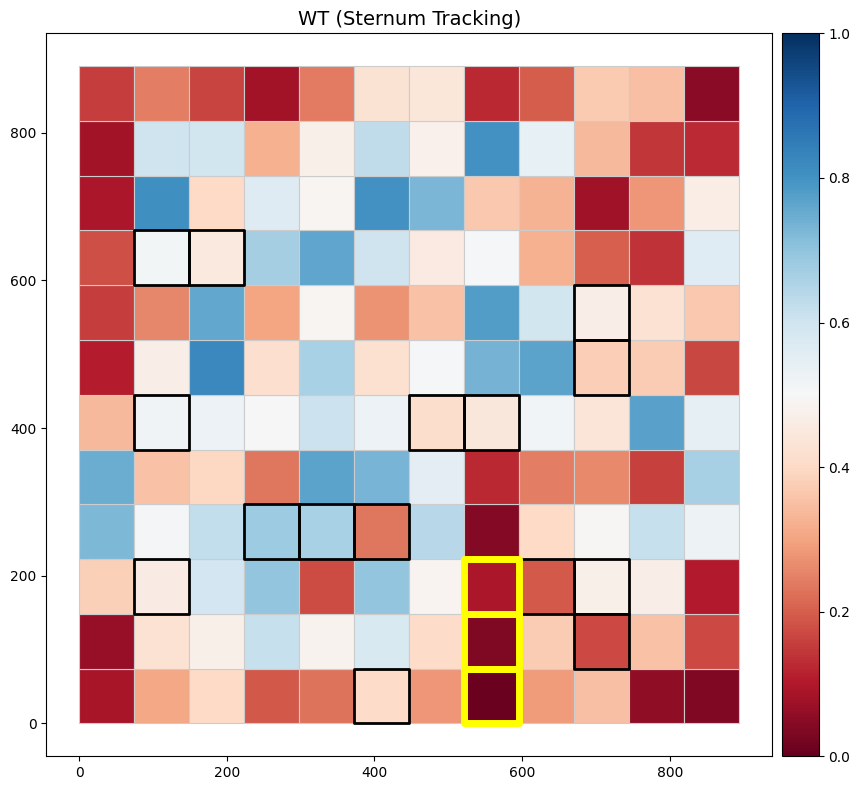

Decision Nodes highlighted in BLACK
Target Nodes highlighted in YELLOW


In [3]:
from compass_labyrinth.post_hoc_analysis.level_1 import (
    compute_state_proportion,
    create_grid_geodata,
    map_points_to_grid,
    merge_state_proportions_to_grid,
    plot_grid_heatmap,
)

genotype_name = 'WT'
grid_filename = "Session0001_grid.shp"

# Step 1: Compute HMM state proportions by grid
state_df = compute_state_proportion(
    df=df_hmm,
    genotype_name=genotype_name,
    hmm_state=2,
)

# Step 2: Load session-specific grid geometry
grid = create_grid_geodata(
    config=config,
    grid_filename=grid_filename,
)

# Step 3: Map mean (x, y) points to grid polygons
pointInPolys = map_points_to_grid(state_df, grid)

# Step 4: Merge proportions with grid polygons
grid_mapped = merge_state_proportions_to_grid(grid, state_df)

# Step 5: Plot heatmap with overlays for Decision and Target zones
ax = plot_grid_heatmap(
    config=config,
    grid=grid_mapped,
    genotype_name=genotype_name, 
    highlight_grids="decision_reward",
    target_grids="target_zone",
)

print('Decision Nodes highlighted in BLACK')
print('Target Nodes highlighted in YELLOW')

## Heatmap representations of all genotypes

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\all_genotypes_grid_heatmap.pdf


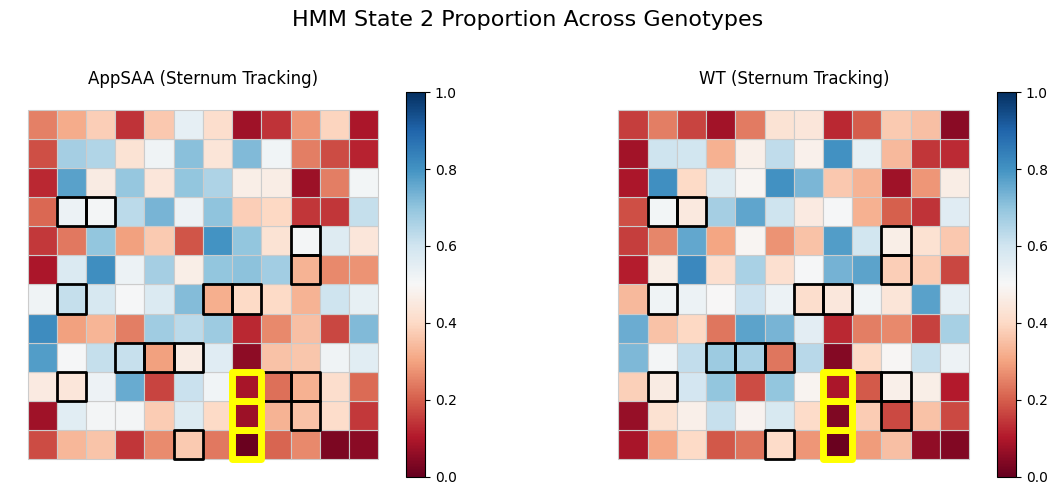

In [4]:
from compass_labyrinth.post_hoc_analysis.level_1 import plot_all_genotype_heatmaps


plot_all_genotype_heatmaps(
    config=config,
    df_hmm=df_hmm,
    grid_filename = grid_filename,
    highlight_grids="decision_reward",
    target_grids="target_zone",
    hmm_state=2,
    cmap='RdBu',
)

## Interactive Heatmap version

In [5]:
from compass_labyrinth.post_hoc_analysis.level_1 import (
    compute_state_proportion,
    create_grid_geodata,
    get_grid_centroids,
    plot_interactive_heatmap,
    overlay_trajectory_lines_plotly,
)


genotype_name = 'WT'

# 1. Compute state proportions
state_df = compute_state_proportion(df_hmm, genotype_name)

# 2. Load session-specific grid geometry
grid = create_grid_geodata(
    config=config,
    grid_filename=grid_filename,
)

# 3. Merge proportion values to grid
grid_mapped = merge_state_proportions_to_grid(grid, state_df)

# 4. Get grid centroids
grid_centroids = get_grid_centroids(grid_mapped)

# 5. Plot heatmap
fig = plot_interactive_heatmap(
    config=config,
    grid_mapped=grid_mapped,
    genotype_name=genotype_name,
    decision_grids="decision_reward",
    target_grids="target_zone",
    show_fig=False,
    return_fig=True,
)

# 6. Overlay smooth trajectory lines
overlay_trajectory_lines_plotly(
    fig=fig,
    df_hmm=df_hmm,
    genotype_name=genotype_name,
    grid_centroids=grid_centroids,
    top_percent=.1,
)

# 7. Show
fig.show()

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\WT_interactive_grid_heatmap.html


## Interactive Heatmap version of all genotypes

In [7]:
from compass_labyrinth.post_hoc_analysis.level_1 import plot_all_genotype_interactive_heatmaps


plot_all_genotype_interactive_heatmaps(
    config=config,
    df_hmm=df_hmm,
    grid_filename="Session0001_grid.shp",
    hmm_state=2,
    decision_grids="decision_reward",
    target_grids="target_zone",
    top_percent=.1,
)

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\all_genotypes_interactive_grid_heatmap.html


# Plot 2: Probability of Surveillance across Node Types and Regions

This workflow computes and visualizes the probability of HMM state occupancy across behavioral Node Types/Regions

### Recommended Use:
1. Ensure `df_hmm` includes 'Genotype', 'Session', 'HMM_State', 'NodeType', and 'Grid.Number'.
2. If analyzing decision complexity, pass lists of `decision_3way` and `decision_4way` grid numbers.
3. Use `compute_state_probability()` to get HMM state proportions per category.
4. Use `plot_state_probability_boxplot()` to visualize across genotypes.

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\state_1_probability_by_NodeType.pdf


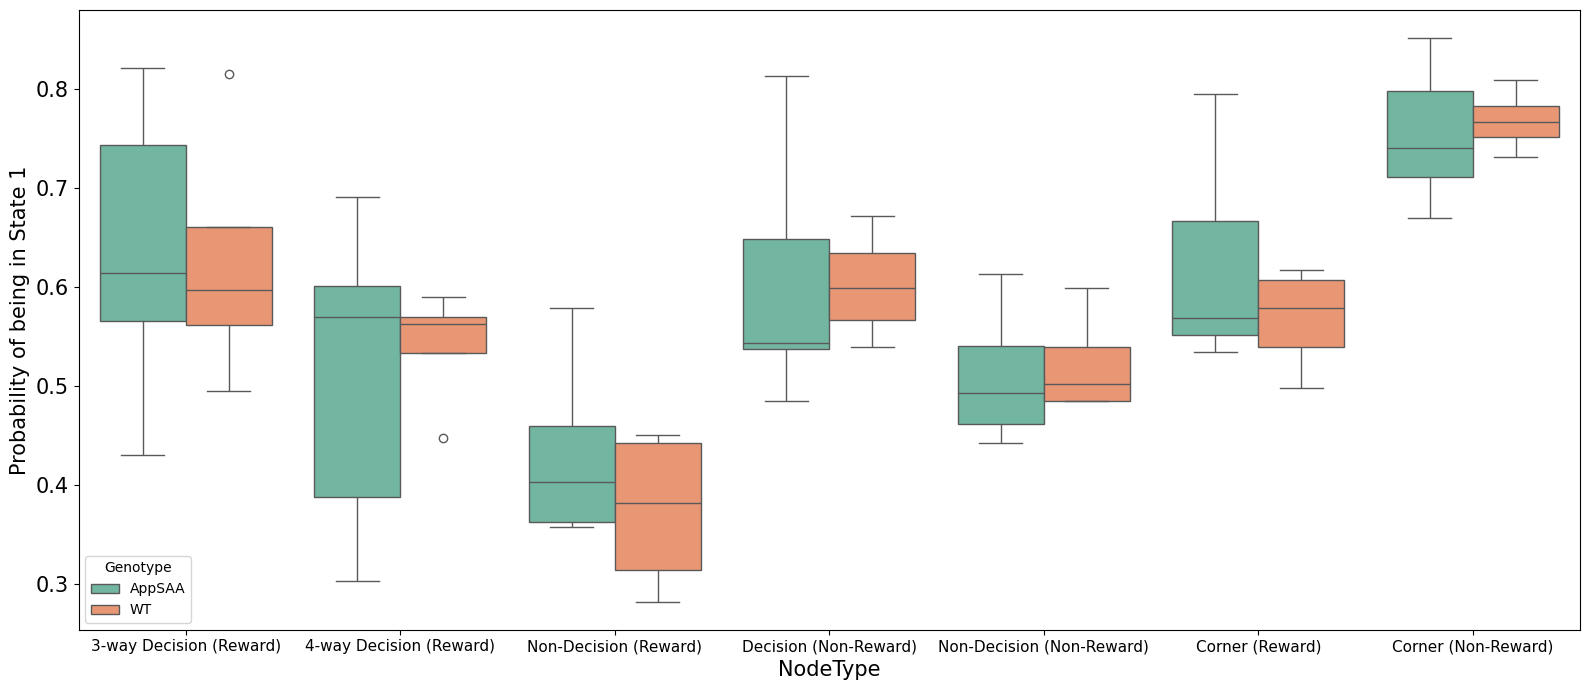

In [8]:
from compass_labyrinth.post_hoc_analysis.level_1 import (
    compute_state_probability,
    plot_state_probability_boxplot,
)


column_of_interest = 'NodeType'
values_displayed = [
    '3-way Decision (Reward)', '4-way Decision (Reward)','Non-Decision (Reward)', 
    'Decision (Non-Reward)', 'Non-Decision (Non-Reward)',
    'Corner (Reward)', 'Corner (Non-Reward)'
]
state = 1

# Step 1: Compute proportions
state_count_df = compute_state_probability(
    df_hmm=df_hmm,
    column_of_interest=column_of_interest,
    values_displayed=values_displayed,
    state=state,
)

# Step 2: Plot boxplot
plot_state_probability_boxplot(
    config=config,
    state_count_df=state_count_df,
    column_of_interest=column_of_interest,
    state=state,
)

In [9]:
from compass_labyrinth.post_hoc_analysis.level_1 import run_pairwise_ttests


# T-tests amongst genotypes per category
ttest_results = run_pairwise_ttests(state_count_df, column_of_interest='NodeType')
print(ttest_results.sort_values("P-value"))

                       Group Genotype1 Genotype2    T-stat   P-value
3            Corner (Reward)    AppSAA        WT  1.001977  0.346608
6      Non-Decision (Reward)    AppSAA        WT  0.993823  0.354800
2        Corner (Non-Reward)    AppSAA        WT -0.463500  0.656131
1    4-way Decision (Reward)    AppSAA        WT -0.400564  0.700608
5  Non-Decision (Non-Reward)    AppSAA        WT -0.365479  0.724962
0    3-way Decision (Reward)    AppSAA        WT  0.115950  0.910987
4      Decision (Non-Reward)    AppSAA        WT -0.031100  0.976006


# Plot 3: Probability of States over Time

This workflow analyzes how the probability of being in a specific HMM state (e.g., State 2) evolves over time at decision vs. non-decision nodes. It computes median probabilities across sessions using sliding time bins and plots the resulting curves to compare decision-related dynamics.

### Recommended Use:
1. Ensure `df_hmm` contains columns: 'Time', 'Session', 'Grid.Number', 'HMM_State', 'NodeType', and 'Genotype'.
2. Define grid numbers corresponding to `Decision_Reward` and `NonDecision_Reward` nodes.
3. Set a time window (`lower_limit` to `upper_limit`) and a `bin_size` (e.g., 2000 frames) to compute time bins.
4. Use `compute_node_state_medians_over_time()` to calculate median state occupancy at decision vs. non-decision nodes.
5. Optionally filter the resulting DataFrame (`Deci_DF`) using a `threshold` to only keep early time bins.
6. Visualize the trajectory of state occupancy using `plot_node_state_median_curve()`.

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\temporal_median_state_probability_curve.pdf


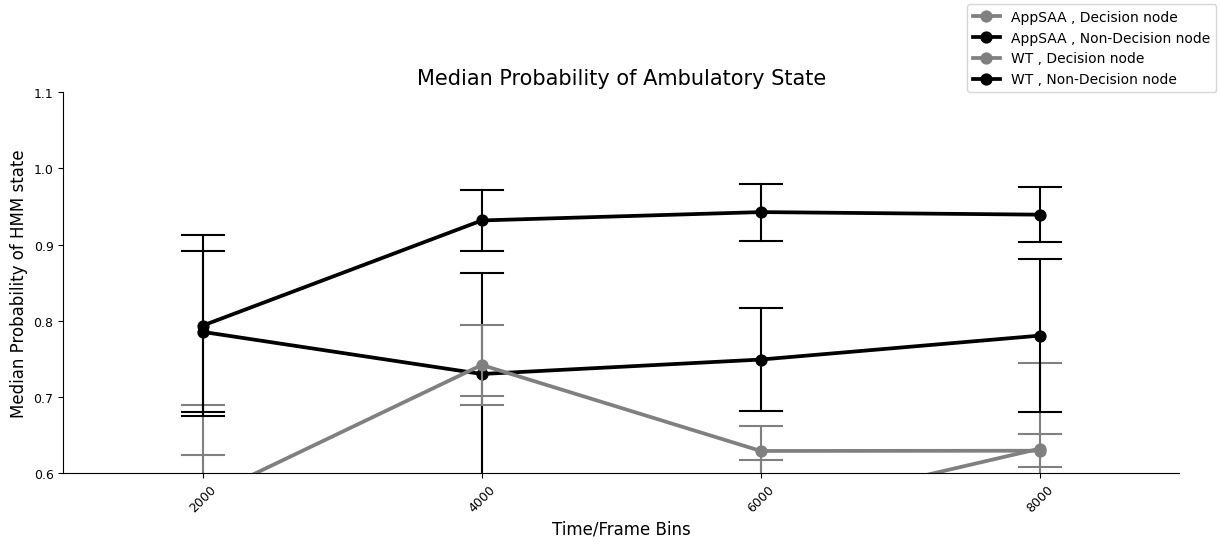

In [15]:
from compass_labyrinth.post_hoc_analysis.level_1 import (
    get_max_session_row_bracket,
    get_min_session_row_bracket,
    compute_node_state_medians_over_time,
    plot_node_state_median_curve,
)


lower_limit = 0
# upper_limit = get_max_session_row_bracket(df_hmm)
threshold =  get_min_session_row_bracket(df_hmm)  # Only show bins where all sessions are present
upper_limit = 50000
bin_size = 2000
palette = ['grey', 'black']
figure_ylimit = (0.6, 1.1)

# Step 1: Compute median probability of being in State 1 across time bins
deci_df = compute_node_state_medians_over_time(
    df_hmm=df_hmm,
    state_types=[2],
    lower_lim=lower_limit,
    upper_lim=upper_limit,
    bin_size=bin_size
)

# Step 2: Optional filter to only plot early session bins
deci_df = deci_df.loc[deci_df.Time_Bins < threshold]

# Step 3: Plot time-evolving median probability curves
plot_node_state_median_curve(
    config=config,
    deci_df=deci_df,
    palette=palette,
    figure_ylimit=figure_ylimit,
    fig_title = 'Median Probability of Ambulatory State'
)

# Plot 4: Surveillance Probability by Bout Type

This workflow evaluates behavioral surveillance patterns at decision nodes across navigational bouts in the maze. It segments the session into bouts, computes  surveillance probability for each bout at decision nodes, and visualizes the average surveillance behavior across successful and unsuccessful bouts.

### Recommended Use:
1. Ensure `df_hmm` contains columns: 'Grid.Number', 'Session', 'Genotype', and maze node annotations.
2. Use `assign_bout_indices()` to segment sessions into bouts based on re-entries into the maze (e.g., delimiter node 47).
3. Run `compute_surveillance_probabilities()` to calculate surveillance at specified decision nodes for each bout.
4. Use `plot_surveillance_by_bout()` to generate a grouped barplot comparing surveillance probability between successful and unsuccessful bouts, including a t-test p-value.

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\surveillance_probability_by_bout.pdf


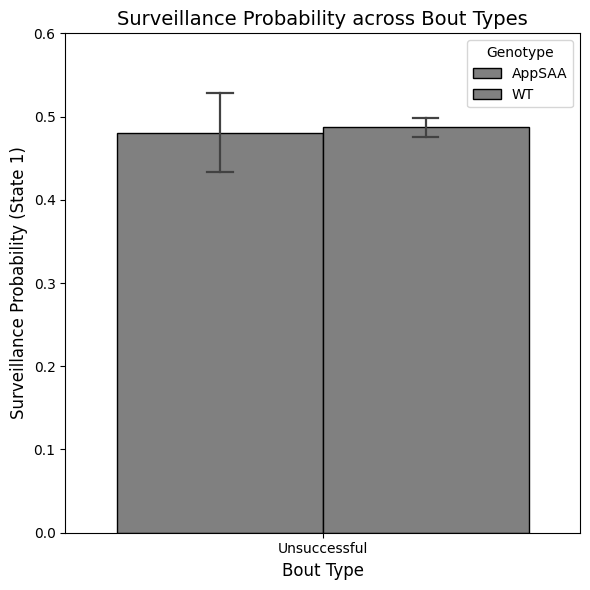

In [11]:
from compass_labyrinth.post_hoc_analysis.level_1 import (
    assign_bout_indices,
    compute_surveillance_probabilities,
    plot_surveillance_by_bout,
)


# Assign Bout Numbers 
# Bout = Entry node 47 --> Other non-entry nodes --> Entry node 47
df_hmm = assign_bout_indices(
    df=df_hmm,
    delimiter_node=47,
)

# Compute surveillance probability at Decision nodes by Bout type
# Successful-> reached the target atleast once/Unsuccessful-> doesn't reached the target
index_df, median_df = compute_surveillance_probabilities(
    df_hmm=df_hmm,
    decision_nodes="decision_reward",
)

# Barplot to depict the above with ttest-ind pvalue
plot_surveillance_by_bout(
    config=config,
    median_df=median_df,
    ylim=0.6,
)

In [12]:
from compass_labyrinth.post_hoc_analysis.level_1 import run_within_genotype_mixedlm_with_fdr


# LMM for same genotype comparison across Bout types
df_within = run_within_genotype_mixedlm_with_fdr(index_df)

# Print results
print("Within-Genotype (Successful vs Unsuccessful):")
print(df_within)

Within-Genotype (Successful vs Unsuccessful):
Empty DataFrame
Columns: [FDR P-value, Significant (FDR < 0.05)]
Index: []


In [13]:
from compass_labyrinth.post_hoc_analysis.level_1 import test_across_genotypes_per_bout


# T-test across genotypes under Successful Bouts
df_across_success = test_across_genotypes_per_bout(median_df, bout_type='Successful')

# T-test across genotypes under Unsuccessful Bouts
df_across_unsuccess = test_across_genotypes_per_bout(median_df, bout_type='Unsuccessful')

# Print results
print("\n Across Genotypes (Successful only):")
print(df_across_success)

print("\n Across Genotypes (Unsuccessful only):")
print(df_across_unsuccess)


 Across Genotypes (Successful only):
Empty DataFrame
Columns: []
Index: []

 Across Genotypes (Unsuccessful only):
      Bout Type Genotype 1 Genotype 2    T-stat   P-value
0  Unsuccessful     AppSAA         WT -0.129369  0.901602
